In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

#from google.colab import drive
#drive.mount("/content/gdrive")



In [2]:
data_dir = "C:\\Users\\USCHIP\\vehicles"

#### Directory for my downloaded 20 inmages for data validation

In [3]:
# Directory for my downloaded 20 inmages for data validation
dir_20_images = "C:\\Users\\USCHIP\\AI twenty images"

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size,

)

Found 4318 files belonging to 4 classes.
Using 3455 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size,

)

Found 4318 files belonging to 4 classes.
Using 863 files for validation.


#### Creating the data validation dataset for my downloaded 20 inmages 

In [7]:
# Creating the data validation dataset for my downloaded 20 inmages 

val_ds_20 = tf.keras.preprocessing.image_dataset_from_directory(
    
    dir_20_images,
    validation_split = 0.9,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size,

)

Found 20 files belonging to 1 classes.
Using 18 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['bus', 'motorcycle', 'plane', 'train']


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

#Notice the pixels values are now in "[0, 1]".

print(np.min(first_image), np.max(first_image))

num_classes = 4

0.012563819 1.0


In [10]:
model = Sequential([
    
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = "same", activation="relu",),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation="relu",),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = "same", activation="relu",),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer = "Adam",
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics = ["accuracy"],
             )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [12]:
epochs = 10
history = model.fit(train_ds,validation_data = val_ds,epochs = epochs)

acc = history.history ["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 105s 959ms/step - loss: 1.2194 - accuracy: 0.4411 - val_loss: 1.0537 - val_accuracy: 0.5411
Epoch 2/10
108/108 [==============================] - 99s 917ms/step - loss: 1.0082 - accuracy: 0.5800 - val_loss: 0.9861 - val_accuracy: 0.5956
Epoch 3/10
108/108 [==============================] - 101s 938ms/step - loss: 0.8875 - accuracy: 0.6437 - val_loss: 0.9819 - val_accuracy: 0.6176
Epoch 4/10
108/108 [==============================] - 92s 851ms/step - loss: 0.7522 - accuracy: 0.6999 - val_loss: 0.9713 - val_accuracy: 0.6095
Epoch 5/10
108/108 [==============================] - 95s 884ms/step - loss: 0.5680 - accuracy: 0.7835 - val_loss: 1.0859 - val_accuracy: 0.6188
Epoch 6/10
108/108 [==============================] - 98s 907ms/step - loss: 0.3764 - accuracy: 0.8660 - val_loss: 1.4300 - val_accuracy: 0.5701
Epoch 7/10
108/108 [==============================] - 113s 1s/step - loss: 0.2686 - accuracy: 0.9146 - val_loss: 1.4457 - val_ac

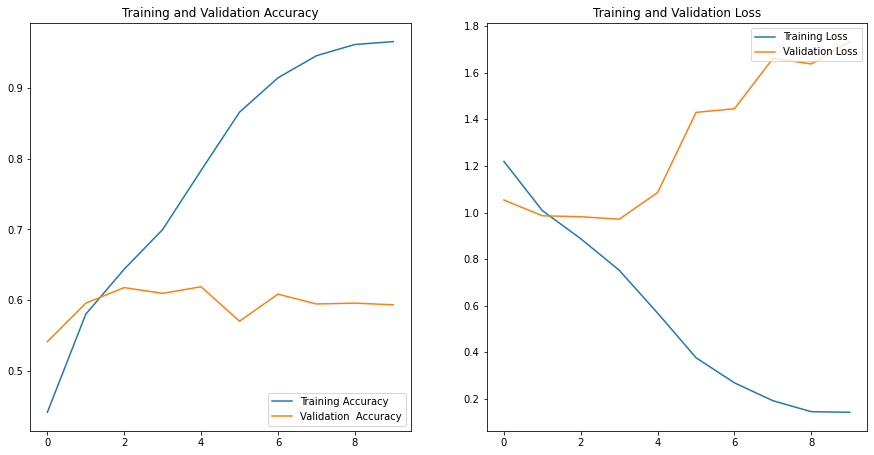

In [13]:
# Plotting the figures

plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation  Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [14]:
# Accuracy and Loss evaluation for data validation
loss,accuracy = model.evaluate(val_ds)
print("Test Accuracy :",accuracy)
print("TestLoss: ",loss)

27/27 [==============================] - 6s 237ms/step - loss: 1.7337 - accuracy: 0.5933
Test Accuracy : 0.593279242515564
TestLoss:  1.7337099313735962


#### Accuracy and Loss evaluation from my 20 downloaded images for data validation

In [15]:
# Accuracy and Loss evaluation from my 20 downloaded images for data validation
loss20,accuracy20 = model.evaluate(val_ds_20)
print("Test 20 Accuracy :",accuracy20)
print("Test 20 Loss: ",loss20)

1/1 [==============================] - 1s 707ms/step - loss: 6.4890 - accuracy: 0.2222
Test 20 Accuracy : 0.2222222238779068
Test 20 Loss:  6.489022254943848


(32, 180, 180, 3)
(32,)


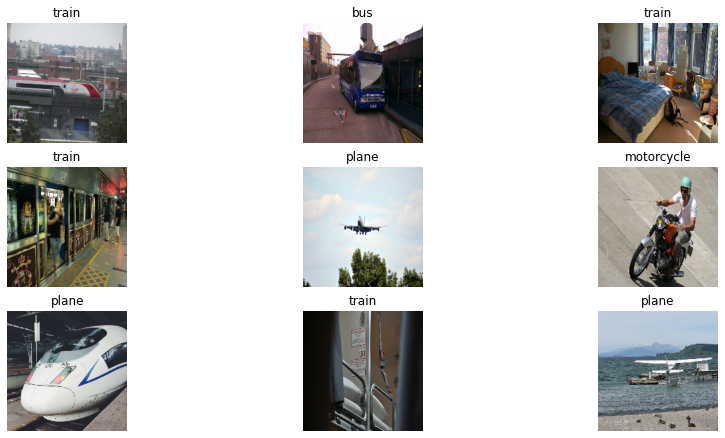

In [16]:
# Transforming the matrices back to images

plt.figure(figsize=(15,7.5))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        
for image_batch,label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break
    

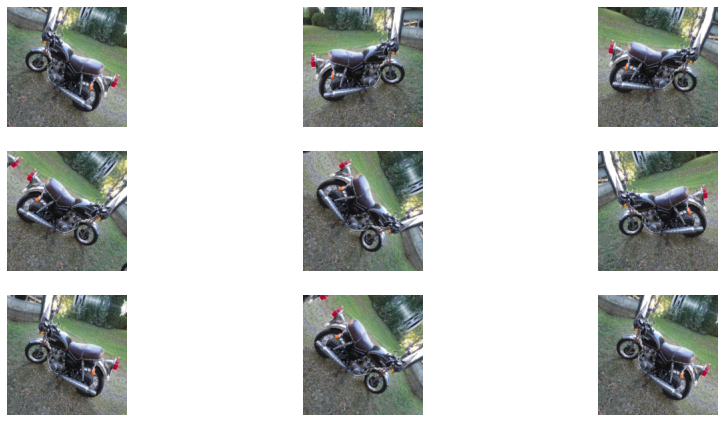

In [17]:
# For data augumentation

data_augumentation = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                          tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

for image, _ in train_ds.take(1):
    plt.figure(figsize=(15,7.5))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        augumented_image = data_augumentation(tf.expand_dims(first_image,0))
        plt.imshow(augumented_image[0]/ 255)
        plt.axis("off")

In [18]:
# Creating the Base model from a pre_trained model MobileNet V2

IMG_SIZE = (180,180)
IMG_SHAPE = IMG_SIZE +(3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights="imagenet"
                                              )

image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1280)


In [19]:
base_model.trainable = False
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(4)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

In [20]:
# Rescaling  our pre-trained model
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [21]:
inputs = tf.keras.Input(shape=(180,180,3))
x = data_augumentation(inputs)
x = preprocess_input(x)
x = base_model(x, training = False)
x = global_average_layer (x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs,outputs)

base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics = ["accuracy"],
             )
model.summary()
len(model.trainable_variables)

initial_epochs = 10

loss0,accuracy0 = model.evaluate(val_ds)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

history = model.fit(train_ds,
                   epochs= initial_epochs,
                   validation_data = val_ds,
                   )

acc = history.history ["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(initial_epochs)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 180, 180, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                             

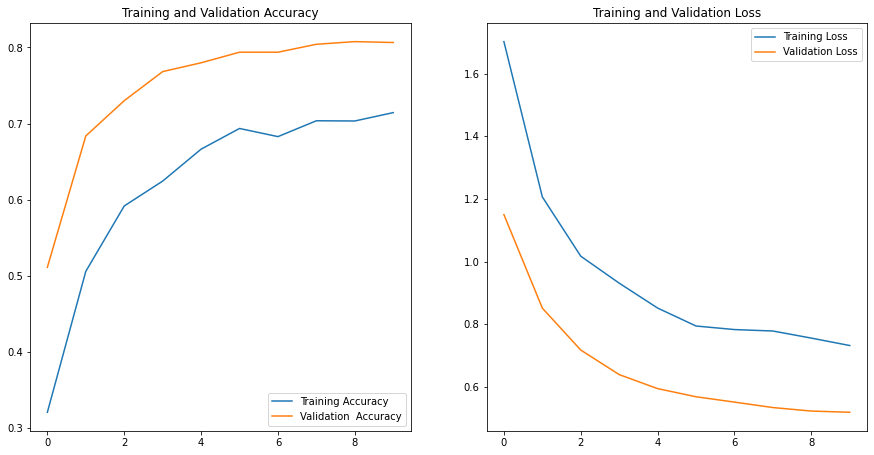

In [22]:
# Plotting the figures

plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation  Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [23]:
# Fine-tuning weights from our pre-trained model

base_model.trainable = True
base_model.summary()

# Checking how many layers are inthe base model
print("Number of layers in the base model:",len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all layers before the "fine_tune_at" layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

#  fine-tuning as a second step to feature extraction
base_learning_rate = 0.0001

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = base_learning_rate/10),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics = ["accuracy"],
             )

# continuing training adding some fine-tuning epochs to our normal training epochs
initial_epochs = 10
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                   epochs = total_epochs,
                    initial_epoch = history.epoch[-1],
                   validation_data = val_ds,
                   )


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

Epoch 10/20
108/108 [==============================] - 192s 2s/step - loss: 0.6873 - accuracy: 0.7271 - val_loss: 0.4944 - val_accuracy: 0.8134
Epoch 11/20
108/108 [==============================] - 201s 2s/step - loss: 0.6126 - accuracy: 0.7658 - val_loss: 0.4641 - val_accuracy: 0.8262
Epoch 12/20
108/108 [==============================] - 191s 2s/step - loss: 0.5859 - accuracy: 0.7719 - val_loss: 0.4554 - val_accuracy: 0.8343
Epoch 13/20
108/108 [==============================] - 184s 2s/step - loss: 0.5487 - accuracy: 0.7861 - val_loss: 0.4547 - val_accuracy: 0.8285
Epoch 14/20
108/108 [==============================] - 166s 2s/step - loss: 0.5156 - accuracy: 0.8006 - val_loss: 0.4521 - val_accuracy: 0.8401
Epoch 15/20
108/108 [==============================] - 175s 2s/step - loss: 0.5079 - accuracy: 0.8032 - val_loss: 0.4430 - val_accuracy: 0.8343
Epoch 16/20
108/108 [==============================] - 181s 2s/step - loss: 0.4799 - accuracy: 0.8124 - val_loss: 0.4510 - val_accuracy:

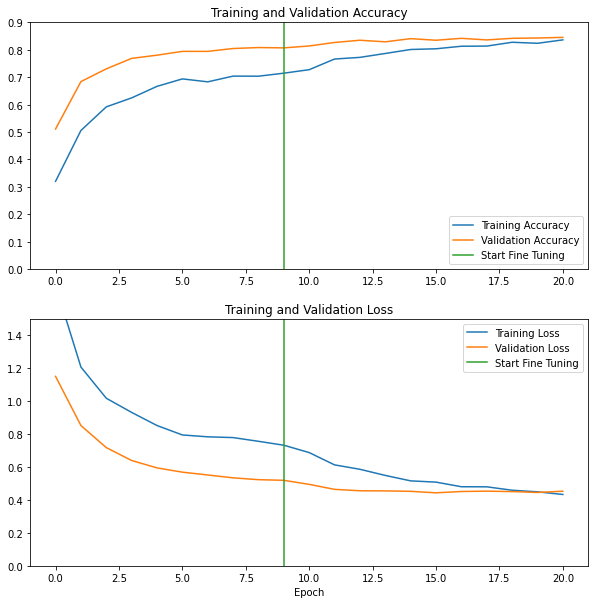

In [24]:
# final plots where you can also see (the green) line and what happened after fine-tuning.

acc += history_fine.history["accuracy"]
val_acc += history_fine.history["val_accuracy"]

loss += history_fine.history["loss"]
val_loss += history_fine.history["val_loss"]

plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.ylim([0,0.9])
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(),label = "Start Fine Tuning")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")


plt.subplot(2,1,2)
plt.plot(loss, label = "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.ylim([0,1.5])
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(),label = "Start Fine Tuning")
plt.legend(loc = "upper right")
plt.title("Training and Validation Loss")

plt.xlabel("Epoch")
plt.show()

In [25]:
loss,accuracy = model.evaluate(val_ds)
print("Test Accuracy :",accuracy)
print("Test Loss: ",loss)

27/27 [==============================] - 20s 738ms/step - loss: 0.4529 - accuracy: 0.8447
Test Accuracy : 0.8447276949882507
Test Loss:  0.45291346311569214


#### Accuracy and Loss evaluation from my 20 downloaded images for data validation

In [26]:
# Accuracy and Loss evaluation from my 20 downloaded images for data validation
loss20,accuracy20 = model.evaluate(val_ds_20)
print("Test 20 Accuracy :",accuracy20)
print("Test 20 Loss: ",loss20)

1/1 [==============================] - 1s 693ms/step - loss: 4.6896 - accuracy: 0.2778
Test 20 Accuracy : 0.2777777910232544
Test 20 Loss:  4.689645290374756
